import the libraries

In [1]:
from keras.models import Sequential

In [2]:
from keras.layers import Dense

In [3]:
from keras.layers import Conv2D

In [4]:
from keras.layers import MaxPool2D

In [5]:
from keras.layers import Flatten

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
x_train = train_datagen.flow_from_directory(r'split/train',
                                          target_size=(256,256),
                                          color_mode='rgb',
                                          class_mode="categorical",
                                          batch_size=32)

Found 3002 images belonging to 8 classes.


In [9]:
x_test = train_datagen.flow_from_directory(r'split/test',
                                          target_size=(256,256),
                                          color_mode='rgb',
                                          class_mode="categorical",
                                          batch_size=32)

Found 1001 images belonging to 8 classes.


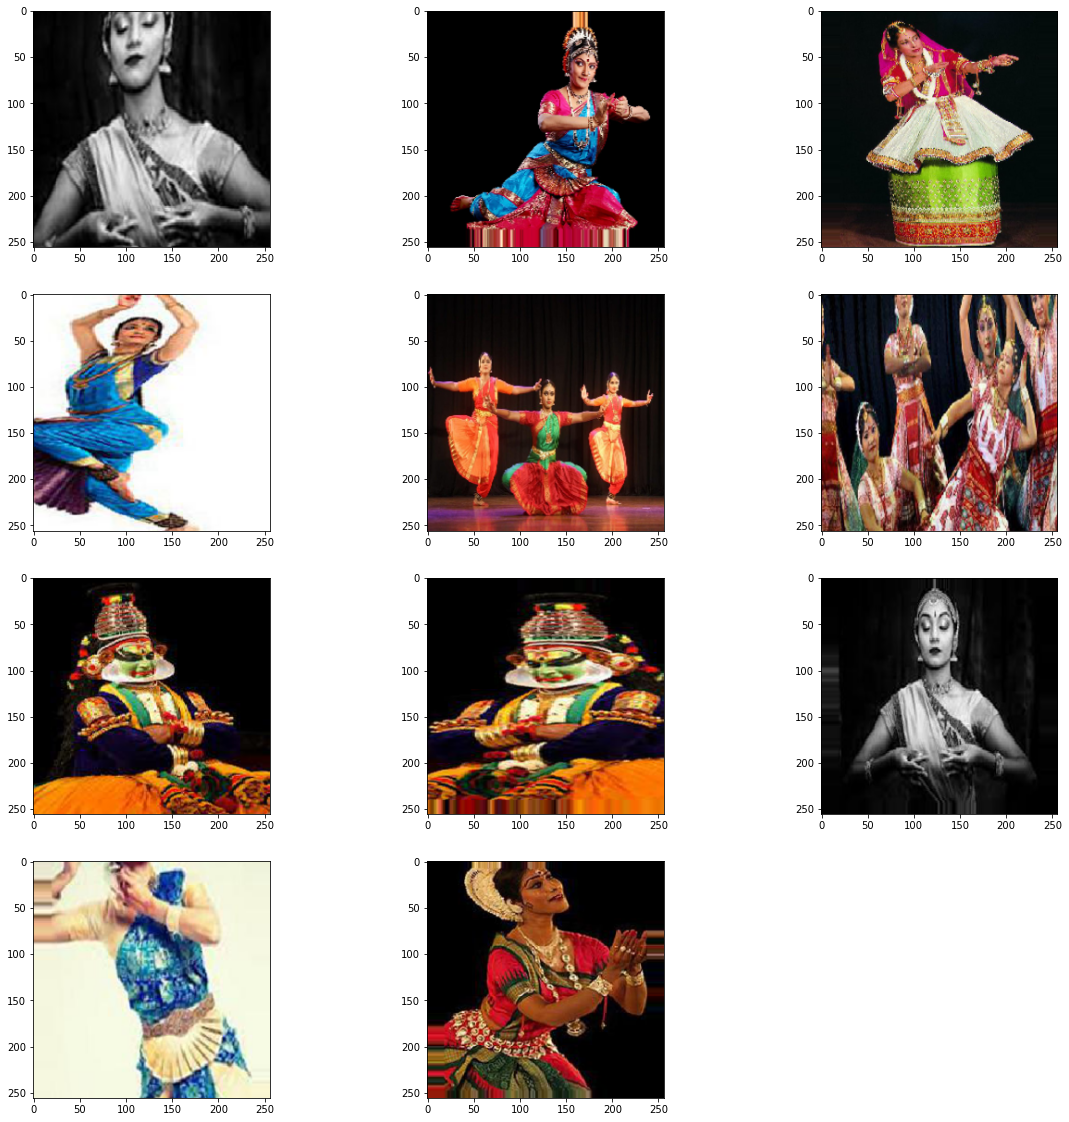

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i,image in enumerate(x_train,1):
    if(i==12):
        break
    plt.subplot(4,3,i)
    plt.imshow(image[0][31])

In [11]:
x_train.class_indices

{'bharatanatyam': 0,
 'kathak': 1,
 'kathakali': 2,
 'kuchipudi': 3,
 'manipuri': 4,
 'mohiniyattam': 5,
 'odissi': 6,
 'sattriya': 7}

Init the CNN model

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),input_shape=(256,256,3),activation="relu"))

In [14]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [15]:
model.add(Conv2D(filters = 32, kernel_size=(3,3), strides = (2,2), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units = 500,kernel_initializer = 'random_uniform',activation = 'relu'))
model.add(Dense(units = 500,kernel_initializer = 'random_uniform',activation = 'relu'))
model.add(Dense(units = 500,kernel_initializer = 'random_uniform',activation = 'relu'))

In [18]:
model.add(Dense(units = 8,kernel_initializer = 'random_uniform',activation = 'softmax'))

In [19]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 500)               3

In [21]:
3002/32

93.8125

In [22]:
1001/32

31.28125

In [23]:
model.fit_generator(x_train,steps_per_epoch=93,epochs=10,validation_data=x_test,validation_steps=31)

C:\Users\Likitha\AppData\Local\Temp/ipykernel_18040/1280151001.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=93,epochs=10,validation_data=x_test,validation_steps=31)


Epoch 1/10
93/93 [==============================] - 78s 834ms/step - loss: 1.7596 - accuracy: 0.3717 - val_loss: 1.4699 - val_accuracy: 0.4607
Epoch 2/10
93/93 [==============================] - 79s 848ms/step - loss: 1.1463 - accuracy: 0.5983 - val_loss: 0.8527 - val_accuracy: 0.6895
Epoch 3/10
93/93 [==============================] - 81s 873ms/step - loss: 0.6995 - accuracy: 0.7562 - val_loss: 0.6218 - val_accuracy: 0.7843
Epoch 4/10
93/93 [==============================] - 86s 931ms/step - loss: 0.3958 - accuracy: 0.8717 - val_loss: 0.5127 - val_accuracy: 0.8438
Epoch 5/10
93/93 [==============================] - 76s 816ms/step - loss: 0.2534 - accuracy: 0.9192 - val_loss: 0.2599 - val_accuracy: 0.9143
Epoch 6/10
93/93 [==============================] - 77s 825ms/step - loss: 0.1552 - accuracy: 0.9505 - val_loss: 0.1451 - val_accuracy: 0.9647
Epoch 7/10
93/93 [==============================] - 69s 739ms/step - loss: 0.0895 - accuracy: 0.9727 - val_loss: 0.2279 - val_accuracy: 0.9385

In [24]:
model.save("danceforms.h5")

In [25]:
from keras.models import load_model
import cv2
import numpy as np

In [26]:
cnnmodel = load_model("danceforms.h5")

In [27]:
def detect(frame):
    img=cv2.resize(frame,(256,256))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #scaling to 0 to 1 range 
    if(np.max(img)>1):
            img = img/255.0
    img = np.array([img])
    prediction = cnnmodel.predict(img)
    label=['bharatanatyam', 'kathak', 'kathakali', 'kuchipudi', 'manipuri', 'mohiniyattam',
                   'odissi', 'sattriya']
    prediction = np.argmax(prediction)
    print("Prediction:",prediction)
    return plt.imshow(img[0]),print(label[prediction])
    

In [28]:
image = cv2.imread('check.jpg')

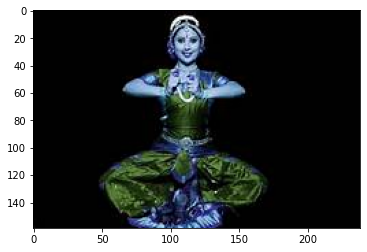

In [29]:
import matplotlib.pyplot as plt
plt.imshow(image)

1/1 [==============================] - 0s 107ms/step
Prediction: 0
bharatanatyam


(<matplotlib.image.AxesImage at 0x1fa9d81cc70>, None)

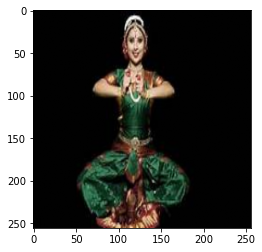

In [30]:
detect(image)

In [31]:
image2 = cv2.imread('check2.jpg')

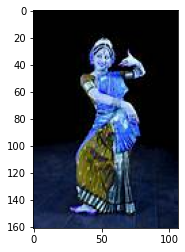

In [32]:
plt.imshow(image2)

1/1 [==============================] - 0s 21ms/step
Prediction: 2
kathakali


(<matplotlib.image.AxesImage at 0x1fa9d09e9a0>, None)

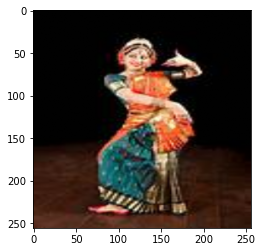

In [33]:
detect(image2)

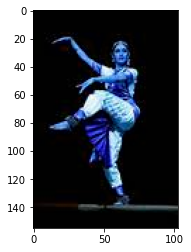

In [34]:
image3 = cv2.imread('check3.jpg')
plt.imshow(image3)

1/1 [==============================] - 0s 26ms/step
Prediction: 7
sattriya


(<matplotlib.image.AxesImage at 0x1fa9d08f430>, None)

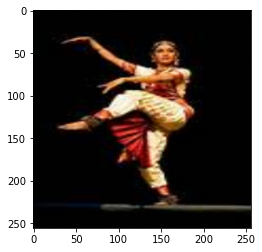

In [35]:
detect(image3)

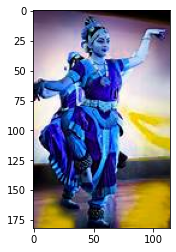

In [36]:
image4 = cv2.imread('check4.jpg')
plt.imshow(image4)

1/1 [==============================] - 0s 35ms/step
Prediction: 3
kuchipudi


(<matplotlib.image.AxesImage at 0x1fa9cf1f0d0>, None)

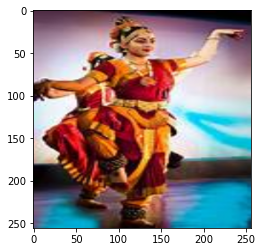

In [37]:
detect(image4)

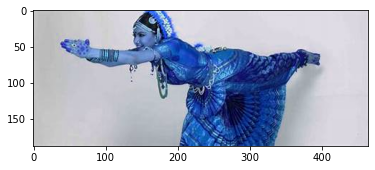

In [40]:
image5 = cv2.imread('check5.jpg')
plt.imshow(image5)

1/1 [==============================] - 0s 25ms/step
Prediction: 6
odissi


(<matplotlib.image.AxesImage at 0x1fa9e5c3400>, None)

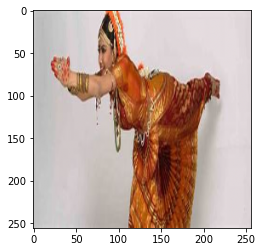

In [41]:
detect(image5)

1/1 [==============================] - 0s 25ms/step
Prediction: 2
kathakali


(<matplotlib.image.AxesImage at 0x1fa9ff52bb0>, None)

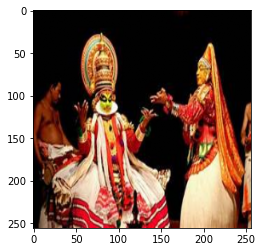

In [42]:
image6 = cv2.imread('check6.jpg')
detect(image6)